<a href="https://colab.research.google.com/github/Kavinaya05/Kavinaya_Assessment/blob/main/Kavinaya_Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error



In [103]:
df = pd.read_csv('Dataset.csv')

In [104]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

In [105]:
print(f"Missing values in dataset:\n{df.isnull().sum()}")
df.fillna(method='ffill', inplace=True)

Missing values in dataset:
Date             0
Local Route      0
Light Rail       0
Peak Service     0
Rapid Route      0
School           0
Other           20
dtype: int64


<ipython-input-105-23f7cbc4a2e5>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


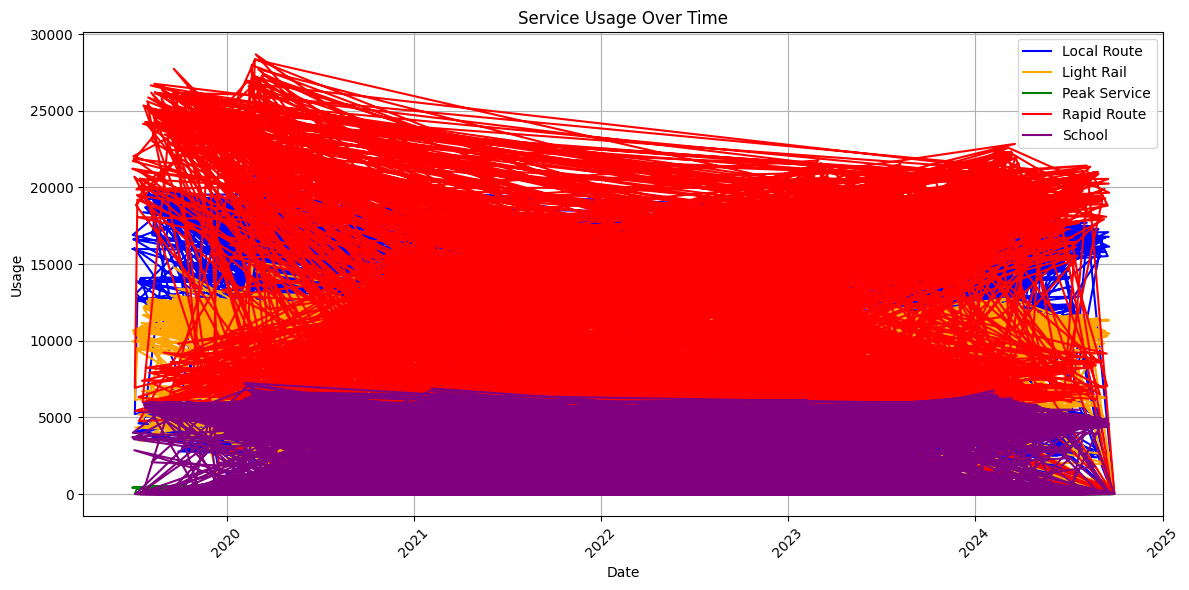

In [106]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Local Route'], label='Local Route', color='blue')
plt.plot(df['Date'], df['Light Rail'], label='Light Rail', color='orange')
plt.plot(df['Date'], df['Peak Service'], label='Peak Service', color='green')
plt.plot(df['Date'], df['Rapid Route'], label='Rapid Route', color='red')
plt.plot(df['Date'], df['School'], label='School', color='purple')
plt.xlabel('Date')
plt.ylabel('Usage')
plt.title('Service Usage Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()



In [107]:
df['Day'] = (df['Date'] - df['Date'].min()).dt.days



In [109]:
services = ['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School']
predictions = {}

for service in services:

    X = df[['Day']]
    y = df[service]


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


    model = LinearRegression()
    model.fit(X_train, y_train)


    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"MAE for {service}: {mae:.2f}")



MAE for Local Route: 5254.94
MAE for Light Rail: 2692.79
MAE for Peak Service: 128.15
MAE for Rapid Route: 5435.64
MAE for School: 2366.26


In [117]:
future_days = np.arange(df['Day'].max() + 1, df['Day'].max() + 8).reshape(-1, 1)
forecast = model.predict(future_days)
predictions[service] = forecast

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


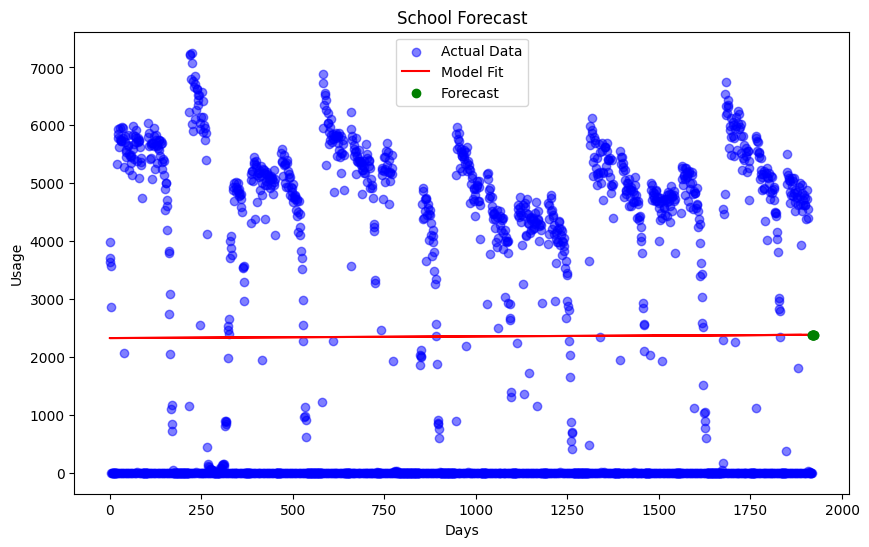

In [110]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', alpha=0.5, label='Actual Data')
plt.plot(X, model.predict(X), color='red', label='Model Fit')
plt.scatter(future_days, forecast, color='green', label='Forecast', zorder=5)
plt.title(f'{service} Forecast')
plt.xlabel('Days')
plt.ylabel('Usage')
plt.legend()
plt.show()



In [123]:
forecast_df = pd.DataFrame(predictions, index=future_days.flatten())
forecast_df.index.name = 'Day'
print("\nForecast for the Next 7 Days for all services:")
print(forecast_df)


Forecast for the Next 7 Days for all services:
           School   Local Route   Light Rail  Peak Service   Rapid Route
Day                                                                     
1918  2382.069640  10528.505033  8194.004970    184.659342  13218.089391
1919  2382.098907  10529.135736  8194.991240    184.662881  13218.636017
1920  2382.128174  10529.766439  8195.977510    184.666421  13219.182644
1921  2382.157441  10530.397142  8196.963780    184.669961  13219.729271
1922  2382.186707  10531.027845  8197.950051    184.673500  13220.275897
1923  2382.215974  10531.658548  8198.936321    184.677040  13220.822524
1924  2382.245241  10532.289251  8199.922591    184.680580  13221.369150
